<a href="https://colab.research.google.com/github/Al95200/handwritten_recognition/blob/master/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and loading dataset

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

2.2.0


In [2]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


For this model we feed our neural network with 60 000 images and we will evaluate it with 10 000 images.

In [3]:
X_train = X_train / 255.0

X_test = X_test / 255.0

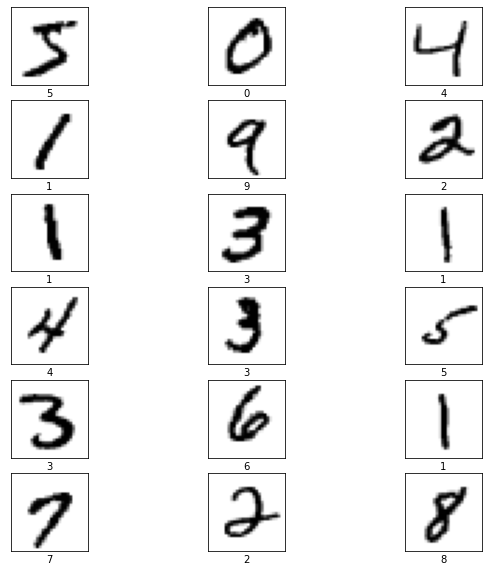

In [4]:
plt.figure(figsize=(10,10))
tmp_print = list()
for i in range(18):
    plt.subplot(6,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    tmp_print.append(Y_train[i])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

# Building the model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer of this network transform our data to a 28*28 one dimensional array. Next, we have 2 layer with fully connected neural layer, the first return 128 neurons and the last one return an array of length 10 which contains our predicted data 

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Before training, we need to define a loss function which measures the accuracy of the model, the optimizer which update the value of each neurons and the metrics which is the value to optimize.

# Training and Testing the model

Now we can train our model and evaluate accuracy with training datas.

In [7]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2607 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1168 - accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0803 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0468 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0388 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [8]:
test_loss, test_acc = model.evaluate(X_train,  Y_train, verbose=2)

print('\nTest accuracy:', test_acc)

1875/1875 - 3s - loss: 0.0118 - accuracy: 0.9967

Test accuracy: 0.996666669845581


Finally we can make prediction in our test set.

In [9]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [10]:
print(np.argmax(predictions[0]))
print(Y_test[0])

7
7


With np.argmax(predictions[0]) we can see which class has the highest confidence.
With Y_test[0] we see what is the actual class.